You are given a 2D integer array points where points[i] = [xi, yi] represents the coordinates of the ith point on the Cartesian plane.

Return the number of unique trapezoids that can be formed by choosing any four distinct points from points.

A trapezoid is a convex quadrilateral with at least one pair of parallel sides. Two lines are parallel if and only if they have the same slope.

 

Example 1:

Input: points = [[-3,2],[3,0],[2,3],[3,2],[2,-3]]

Output: 2

Explanation:

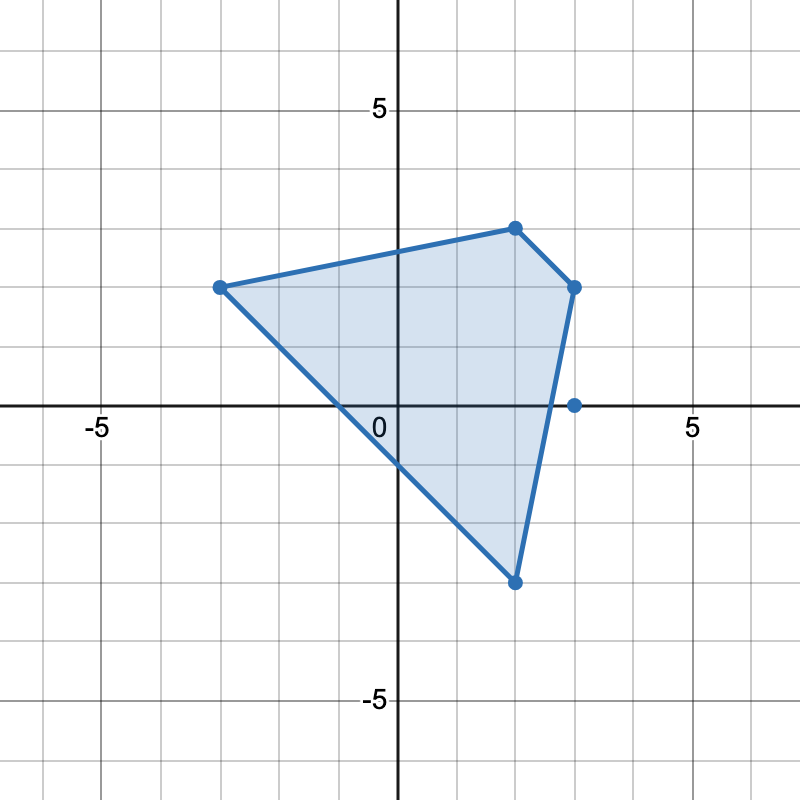

There are two distinct ways to pick four points that form a trapezoid:

    The points [-3,2], [2,3], [3,2], [2,-3] form one trapezoid.
    The points [2,3], [3,2], [3,0], [2,-3] form another trapezoid.

Example 2:

Input: points = [[0,0],[1,0],[0,1],[2,1]]

Output: 1

Explanation:

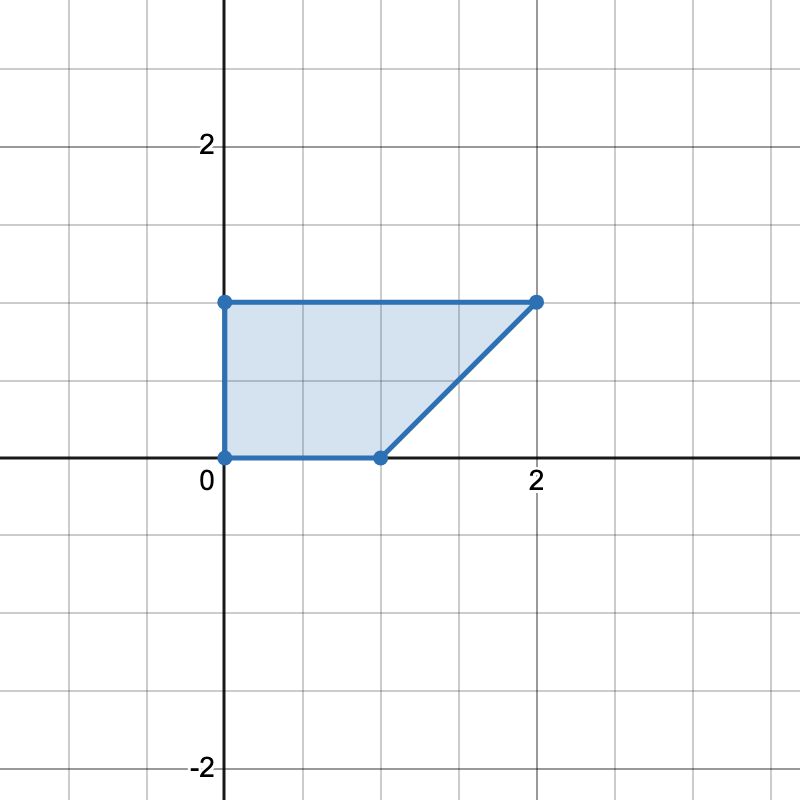

There is only one trapezoid which can be formed.

 

Constraints:

    4 <= points.length <= 500
    –1000 <= xi, yi <= 1000
    All points are pairwise distinct.



In [ ]:
class Solution:
    def countTrapezoids(self, points: List[List[int]]) -> int:
        n = len(points)
        inf = 10**9 + 7
        slope_to_intercept = defaultdict(list)
        mid_to_slope = defaultdict(list)
        ans = 0

        for i in range(n):
            x1, y1 = points[i]
            for j in range(i + 1, n):
                x2, y2 = points[j]
                dx = x1 - x2
                dy = y1 - y2

                if x2 == x1:
                    k = inf
                    b = x1
                else:
                    k = (y2 - y1) / (x2 - x1)
                    b = (y1 * dx - x1 * dy) / dx

                mid = (x1 + x2) * 10000 + (y1 + y2)
                slope_to_intercept[k].append(b)
                mid_to_slope[mid].append(k)

        for sti in slope_to_intercept.values():
            if len(sti) == 1:
                continue

            cnt = defaultdict(int)
            for b_val in sti:
                cnt[b_val] += 1

            total_sum = 0
            for count in cnt.values():
                ans += total_sum * count
                total_sum += count

        for mts in mid_to_slope.values():
            if len(mts) == 1:
                continue

            cnt = defaultdict(int)
            for k_val in mts:
                cnt[k_val] += 1

            total_sum = 0
            for count in cnt.values():
                ans -= total_sum * count
                total_sum += count

        return ans